In [1]:
import os
# set the appropriate path to whichever R installation we'd like to use
os.environ['R_HOME'] = '/Users/nathanielnyema/opt/anaconda3/envs/fnc/lib/R'
import rpy2
import sys
sys.path.append('../')
from fnc_analysis import *
from scipy import stats as st
from statsmodels.stats.multitest import multipletests
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pingouin as pg
from pathlib import Path
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython

In [2]:
# figure settings
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['svg.fonttype']='none'
mpl.rcParams['font.size']= 8
ctl_col = '#D4D4D4'
stim_col = '#06e1e9'

In [3]:
# load tidy data and subset dataframes for later use
data_dir = "../../../data/behavior"

#load unlimited intake
df = load_data(os.path.join(data_dir,'unlimited_intake/total_licks_normal_intake.csv'))
dft = load_data(os.path.join(data_dir,'unlimited_intake/lick_times_normal_intake.csv'))

#select glucose data
#unlimited intake
df_test_g = subset_df(df, 'test')
dft_test_g = subset_df(dft, 'test')

df_train_g = subset_df(df, 'training')
dft_train_g = subset_df(dft, 'training')

## lick micro structure over training

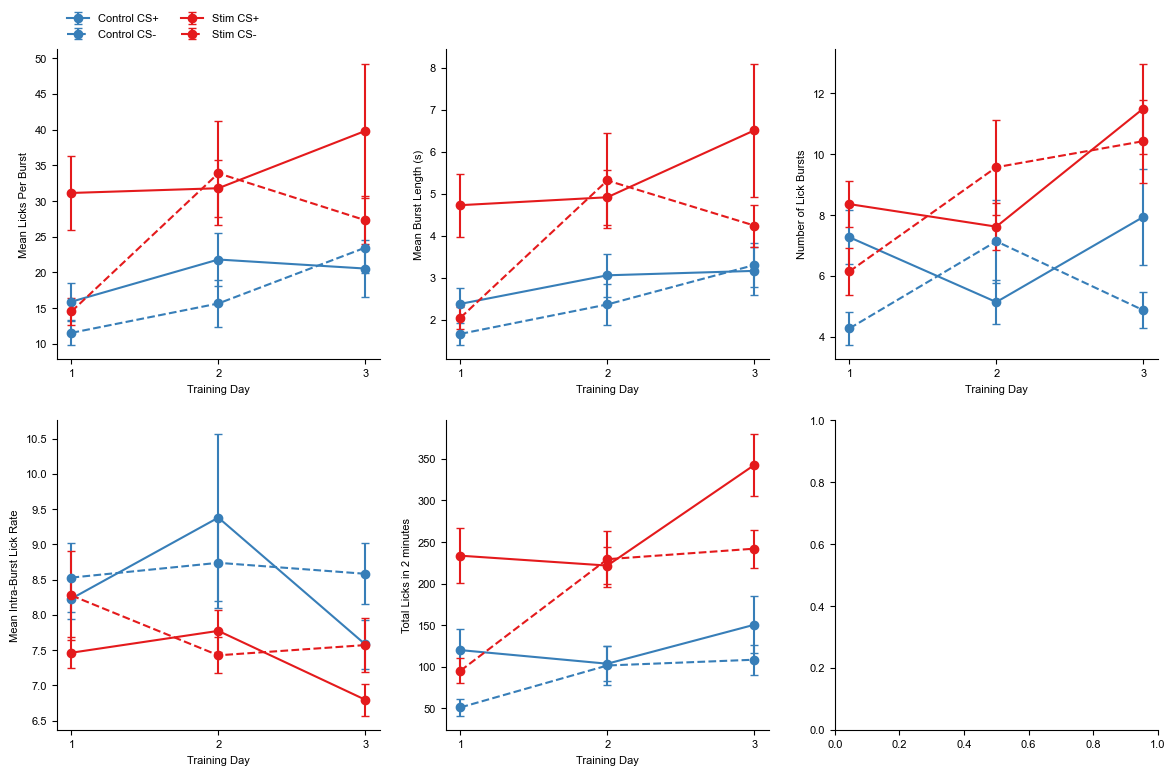

In [4]:
bursts, burst_summ = lick_microstructure(dft_train_g, 2)
fig, ax = plt.subplots(2,3, figsize = (12,8))
plot_training_micro(burst_summ, 'sizes',  ylabel = 'Mean Licks Per Burst', ax = ax[0,0]);
plot_training_micro(burst_summ, 'lens',  ylabel = 'Mean Burst Length (s)', ax = ax[0,1]);
plot_training_micro(burst_summ, 'lr',  ylabel = 'Mean Intra-Burst Lick Rate', ax = ax[1,0]);
plot_training_micro(burst_summ, 'tot',  ylabel = 'Total Licks in 2 minutes', ax = ax[1,1]);
plot_training_micro(burst_summ, 'burst_num',  ylabel = 'Number of Lick Bursts', ax = ax[0,2]);

ax[0,1].get_legend().remove()
ax[1,0].get_legend().remove()
ax[1,1].get_legend().remove()
ax[0,2].get_legend().remove()

fig.tight_layout(pad = 2.)

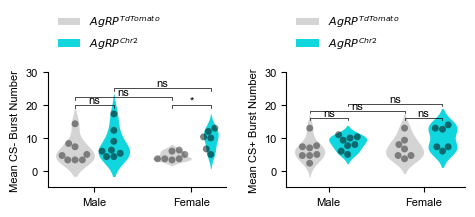

In [5]:
bursts, burst_summ = lick_microstructure(dft_train_g, 2, thresh = .5)
bb = burst_summ.groupby(['Chr2','sex','mouse','CS']).mean()
p = bb.loc[:,:,:,'+'].reset_index()
m = bb.loc[:,:,:,'-'].reset_index()
fig, ax = plt.subplots(1,2, figsize = (5,2.5))
plot_sex_diff(m, 'burst_num', ax = ax[0], ylabel = 'Mean CS- Burst Number', palette = [ctl_col, stim_col])
plot_sex_diff(p, 'burst_num', ax = ax[1], ylabel = 'Mean CS+ Burst Number', palette = [ctl_col, stim_col])
for i in ax.flatten(): i.set_ylim(-5,30)
fig.tight_layout(pad = 2.)
sns.despine()

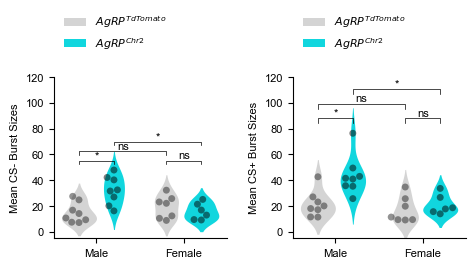

In [6]:
fig, ax = plt.subplots(1,2, figsize = (5,3))
plot_sex_diff(m, 'sizes', ax = ax[0], ylabel = 'Mean CS- Burst Sizes', palette = [ctl_col, stim_col])
plot_sex_diff(p, 'sizes', ax = ax[1], ylabel = 'Mean CS+ Burst Sizes', palette = [ctl_col, stim_col])
for i in ax.flatten(): i.set_ylim(-5,120)
fig.tight_layout(pad = 2.)
sns.despine()

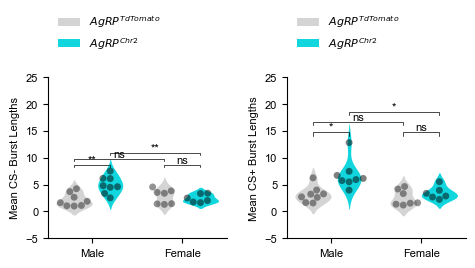

In [7]:
fig, ax = plt.subplots(1,2, figsize = (5,3))
plot_sex_diff(m, 'lens', ax = ax[0], ylabel = 'Mean CS- Burst Lengths', palette = [ctl_col, stim_col])
plot_sex_diff(p, 'lens', ax = ax[1], ylabel = 'Mean CS+ Burst Lengths', palette = [ctl_col, stim_col])
for i in ax.flatten(): i.set_ylim(-5,25)
fig.tight_layout(pad = 2.)
sns.despine()

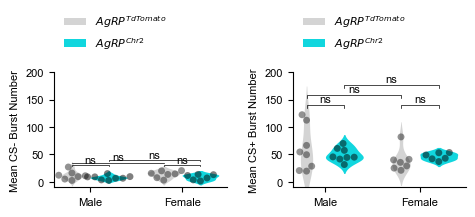

In [8]:
bursts, burst_summ = lick_microstructure(dft_test_g, 60, thresh = .5)
burst_summ  = burst_summ.groupby(['Chr2','sex','CS','mouse']).mean()
m = burst_summ.loc[:,:,'-'].reset_index()
p = burst_summ.loc[:,:,'+'].reset_index()

fig, ax = plt.subplots(1,2, figsize = (5,2.5))
plot_sex_diff(m, 'burst_num', ax = ax[0], ylabel = 'Mean CS- Burst Number', palette = [ctl_col, stim_col])
plot_sex_diff(p, 'burst_num', ax = ax[1], ylabel = 'Mean CS+ Burst Number', palette = [ctl_col, stim_col])
for i in ax.flatten(): i.set_ylim(-10,200)
fig.tight_layout(pad = 2.)
sns.despine()

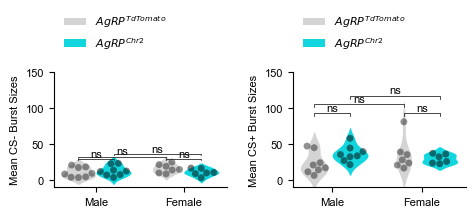

In [9]:
fig, ax = plt.subplots(1,2, figsize = (5,2.5))
plot_sex_diff(m, 'sizes', ax = ax[0], ylabel = 'Mean CS- Burst Sizes', palette = [ctl_col, stim_col])
plot_sex_diff(p, 'sizes', ax = ax[1], ylabel = 'Mean CS+ Burst Sizes', palette = [ctl_col, stim_col])
for i in ax.flatten(): i.set_ylim(-10,150)
fig.tight_layout(pad = 2.)
sns.despine()

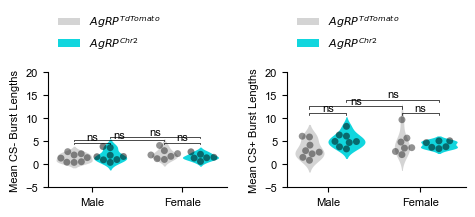

In [10]:
fig, ax = plt.subplots(1,2, figsize = (5,2.5))
plot_sex_diff(m, 'lens', ax = ax[0], ylabel = 'Mean CS- Burst Lengths', palette = [ctl_col, stim_col])
_, s = plot_sex_diff(p, 'lens', ax = ax[1], ylabel = 'Mean CS+ Burst Lengths', palette = [ctl_col, stim_col])
for i in ax.flatten(): i.set_ylim(-5,20)
fig.tight_layout(pad = 2.)
sns.despine()